<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Datengrundlage" data-toc-modified-id="Datengrundlage-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Datengrundlage</a></span></li><li><span><a href="#datetime-Objekte" data-toc-modified-id="datetime-Objekte-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>datetime Objekte</a></span></li><li><span><a href="#Einlesen-der-Zeitreihe" data-toc-modified-id="Einlesen-der-Zeitreihe-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Einlesen der Zeitreihe</a></span></li><li><span><a href="#Datentyp-für-die-Datumsangaben-korrigieren" data-toc-modified-id="Datentyp-für-die-Datumsangaben-korrigieren-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Datentyp für die Datumsangaben korrigieren</a></span></li><li><span><a href="#Date-als-Index-setzen" data-toc-modified-id="Date-als-Index-setzen-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Date als Index setzen</a></span></li><li><span><a href="#Hinzufügen-weiterer-Spalten" data-toc-modified-id="Hinzufügen-weiterer-Spalten-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hinzufügen weiterer Spalten</a></span></li><li><span><a href="#Mal-ein-paar-Zeilen-zufällig-auswählen" data-toc-modified-id="Mal-ein-paar-Zeilen-zufällig-auswählen-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Mal ein paar Zeilen zufällig auswählen</a></span></li><li><span><a href="#Zeitbasierte-Indizierung-mittels-Pandas" data-toc-modified-id="Zeitbasierte-Indizierung-mittels-Pandas-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Zeitbasierte Indizierung mittels Pandas</a></span></li><li><span><a href="#Analysieren-der-Daten-durch-Visualisieren" data-toc-modified-id="Analysieren-der-Daten-durch-Visualisieren-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Analysieren der Daten durch Visualisieren</a></span></li><li><span><a href="#Mehrere-Plots-auf-einmal-erzeugen:" data-toc-modified-id="Mehrere-Plots-auf-einmal-erzeugen:-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Mehrere Plots auf einmal erzeugen:</a></span></li><li><span><a href="#Ist-die-Windenergieproduktion-im-Winter-größer?" data-toc-modified-id="Ist-die-Windenergieproduktion-im-Winter-größer?-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Ist die Windenergieproduktion im Winter größer?</a></span></li></ul></div>

# Datengrundlage

Die folgenden Zeitreihendaten stammen von der "Open Power Systems Data" Initiative:

https://open-power-system-data.org/

Die eigentlichen Daten, mit denen wir arbeiten wollen, können hier runtergeladen werden (es sind bereits vorverarbeitete Daten):

https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

Code zum Vorverarbeitungsprojekt kann hier eingesehen werden:

https://github.com/jenfly/opsd


# datetime Objekte

Um Datums/Zeitangaben zu repräsentieren gibt es das Paket `datetime` in der Standardbibliothek. Wir schauen uns das mal kurz vorab an:

Erstmal machen wir aus einer Zeichenkette ein DateTime Objekt:

In [1]:
import pandas as pd
t = pd.to_datetime('2019-09-15 10:52pm')

In [2]:
t

Timestamp('2019-09-15 22:52:00')

Wir sehen, dass wir als Ergebnis ein Timestamp Objekt erhalten.

In [3]:
type(t)

pandas._libs.tslib.Timestamp

Wir können auch bei der Zeichenkette die Zeitangabe weglassen. Was aber macht Pandas dann daraus?

In [4]:
pd.to_datetime('1/2/1976')

Timestamp('1976-01-02 00:00:00')

Pandas geht dann davon aus, dass die 1. Zahl in der Zeichenkette der Monat ist und nicht der Tag.

Wir können Pandas aber auch mitteilen, dass wir es umgekehrt haben wollen:

In [5]:
pd.to_datetime('1/2/1976', dayfirst=True)

Timestamp('1976-02-01 00:00:00')

Jetzt ist es nicht mehr der 2. Januar, sondern der 01. Februar 1976.

# Einlesen der Zeitreihe

In [1]:
import pandas as pd
d = pd.read_csv('opsd_germany_daily.csv')

In [2]:
d.shape

(4383, 5)

In JupyterLab können wir auch über einen Doppelklick auf die .csv Datei eine Ansicht der Daten in Tabellenform erhalten. Das ist ein kleiner Vorteil von "jupyter lab" gegenüber "jupyter notebook".

Schauen wir uns mal die ersten 4 Zeilen an:

In [3]:
d.head(4)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN


Und jetzt die letzten 4 Zeilen:

In [4]:
d.tail(4)

,Date,Consumption,Wind,Solar,Wind+Solar
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Wir sehen schon: wir müssen uns darauf einstellen, dass nicht alle Zellen Daten enthalten!

In den ersten Zeilen der Tabelle scheint es noch keine Angaben zur Energieproduktion durch Windkraft- bzw. Solaranlagen zu geben.

# Datentyp für die Datumsangaben korrigieren

Was für Datentypen nimmt Pandas eigentlich, um die Einträge in den einzelnen Spalten zu speichern?

In [5]:
d.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

Ups! Pandas erkennt das Datum noch nicht in der "Date" Spalte. Es repräsentiert die Datumsangaben einfach als Zeichenketten/Strings (verwirrend ist, dass das in Pandas "object" heißt).

Wir nutzen jetzt die `to_datetime()` Funktion von Pandas um in einem Rutsch die ganze Spalte "Date", die noch als Zeichenketten erkannt werden, in Datumsobjekte umzuwandeln. 

In [6]:
d["Date"] = pd.to_datetime(d["Date"])

In [7]:
d.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

Juhu! Jetzt erkennt Pandas, dass es sich in der Spalte "Date" auch um Datumsangaben handelt und "denkt" nicht, dass es einfach nur so Zeichenketten sind.

# Date als Index setzen

Bisher sind die Zeilen in der Tabelle einfach nur so durchnummeriert von 1-4383. Das ist aktuelle Index der Daten.

Aber wir wollen jetzt als Indizierung der Daten die Datumsangabe nehmen, denn wir wollen nicht z.B. später sagen:

    "Gib uns doch mal die 42. Angabe des Energieverbrauchs"
    
sondern

    "Gib uns doch mal den Energieverbrauch vom Datum=2006-02-11".

In [8]:
d = d.set_index("Date")

In [9]:
d

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
2006-01-06,1403.42700,NaN,NaN,NaN
2006-01-07,1300.28700,NaN,NaN,NaN
2006-01-08,1207.98500,NaN,NaN,NaN
2006-01-09,1529.32300,NaN,NaN,NaN


Wir können den Index uns auch explizit holen:

In [10]:
d.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

# Hinzufügen weiterer Spalten

In [11]:
d["Wochentag"] = d.index.weekday_name

In [12]:
d

,Consumption,Wind,Solar,Wind+Solar,Wochentag
Date,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,Thursday
2006-01-06,1403.42700,NaN,NaN,NaN,Friday
2006-01-07,1300.28700,NaN,NaN,NaN,Saturday
2006-01-08,1207.98500,NaN,NaN,NaN,Sunday
2006-01-09,1529.32300,NaN,NaN,NaN,Monday


In [13]:
d["Jahr"] = d.index.year
d["Monat"] = d.index.month

In [14]:
d

,Consumption,Wind,Solar,Wind+Solar,Wochentag,Jahr,Monat
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,Sunday,2006,1
2006-01-02,1380.52100,NaN,NaN,NaN,Monday,2006,1
2006-01-03,1442.53300,NaN,NaN,NaN,Tuesday,2006,1
2006-01-04,1457.21700,NaN,NaN,NaN,Wednesday,2006,1
2006-01-05,1477.13100,NaN,NaN,NaN,Thursday,2006,1
2006-01-06,1403.42700,NaN,NaN,NaN,Friday,2006,1
2006-01-07,1300.28700,NaN,NaN,NaN,Saturday,2006,1
2006-01-08,1207.98500,NaN,NaN,NaN,Sunday,2006,1
2006-01-09,1529.32300,NaN,NaN,NaN,Monday,2006,1


Quiz: Erzeugen Sie eine Wochenendespalte!

In [15]:
d["Wochentag"] = d.index.dayofweek

In [16]:
d

,Consumption,Wind,Solar,Wind+Solar,Wochentag,Jahr,Monat
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,6,2006,1
2006-01-02,1380.52100,NaN,NaN,NaN,0,2006,1
2006-01-03,1442.53300,NaN,NaN,NaN,1,2006,1
2006-01-04,1457.21700,NaN,NaN,NaN,2,2006,1
2006-01-05,1477.13100,NaN,NaN,NaN,3,2006,1
2006-01-06,1403.42700,NaN,NaN,NaN,4,2006,1
2006-01-07,1300.28700,NaN,NaN,NaN,5,2006,1
2006-01-08,1207.98500,NaN,NaN,NaN,6,2006,1
2006-01-09,1529.32300,NaN,NaN,NaN,0,2006,1


# Mal ein paar Zeilen zufällig auswählen

In [17]:
import numpy as np

d.sample(5, random_state=np.random.randint(0,100))

,Consumption,Wind,Solar,Wind+Solar,Wochentag,Jahr,Monat
Date,,,,,,,
2006-12-28,1314.60300,NaN,NaN,NaN,3,2006,12
2014-10-06,1433.77900,160.918,82.411,243.329,0,2014,10
2006-01-06,1403.42700,NaN,NaN,NaN,4,2006,1
2012-04-16,1419.06100,164.217,70.576,234.793,0,2012,4
2017-10-20,1469.67145,351.583,62.919,414.502,4,2017,10


In [18]:
d["Wochentag"].dtype

dtype('int64')

# Zeitbasierte Indizierung mittels Pandas

In [19]:
d.loc["2017-09-19"]

Consumption    1429.80947
Wind             86.27800
Solar            93.98900
Wind+Solar      180.26700
Wochentag         1.00000
Jahr           2017.00000
Monat             9.00000
Name: 2017-09-19 00:00:00, dtype: float64

Das folgende ist nun sehr komfortabel. Weil `dateTime` Objekte unsere Indizes sind, können wir jetzt den Teilbereichsoperator anwenden und über Zeitspannen indizieren:

In [20]:
d.loc["2017-09-18" : "2017-09-22"]

,Consumption,Wind,Solar,Wind+Solar,Wochentag,Jahr,Monat
Date,,,,,,,
2017-09-18,1403.63214,55.376,106.991,162.367,0,2017,9
2017-09-19,1429.80947,86.278,93.989,180.267,1,2017,9
2017-09-20,1442.87787,137.566,85.207,222.773,2,2017,9
2017-09-21,1421.64603,45.210,123.775,168.985,3,2017,9
2017-09-22,1401.40633,16.478,113.891,130.369,4,2017,9


Wir können auch "partial-string indexing" anwenden, indem wir nur einen Teilstring angeben:

In [21]:
d["2017-09"]

,Consumption,Wind,Solar,Wind+Solar,Wochentag,Jahr,Monat
Date,,,,,,,
2017-09-01,1361.78735,34.233,83.407,117.640,4,2017,9
2017-09-02,1135.72984,37.373,106.189,143.562,5,2017,9
2017-09-03,1057.50932,26.179,140.194,166.373,6,2017,9
2017-09-04,1359.36636,81.042,168.123,249.165,0,2017,9
2017-09-05,1391.71549,107.604,135.541,243.145,1,2017,9
2017-09-06,1421.76263,409.909,92.002,501.911,2,2017,9
2017-09-07,1406.76505,328.328,100.497,428.825,3,2017,9
2017-09-08,1407.68179,516.670,82.393,599.063,4,2017,9
2017-09-09,1187.91825,276.054,63.259,339.313,5,2017,9


# Analysieren der Daten durch Visualisieren

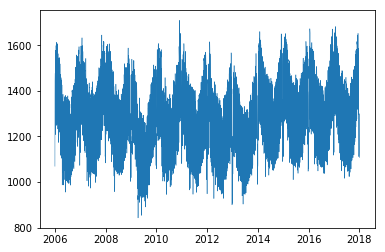

In [22]:
import matplotlib.pyplot as plt

plt.plot( d["Consumption"], linewidth=0.5 )
plt.show()

Wir können das plot aber auch direkt über das Pandas DataFrame Objekt aufrufen:

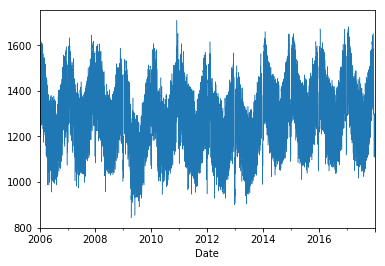

In [23]:
d["Consumption"].plot(linewidth=0.5)
plt.show()

Man sieht: es gibt einen periodischen Verbrauch! 

Zoomen wir mal näher ran!

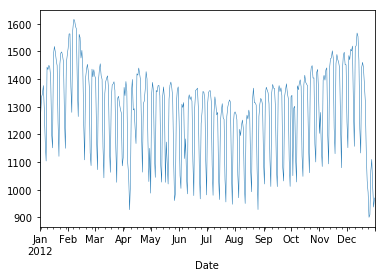

In [24]:
d.loc["2012-01-01":"2012-12-31"]["Consumption"].plot(linewidth=0.5)
plt.show()

Hey! Es sieht so aus, als ob es da noch eine andere Periodizität gibt! Es könnten so in etwa 52 Unterperioden sein, oder?

Lassen Sie uns dies überprüfen!

Wir wollen mal einen Bereich von Mo-So für 2 Wochen ausgeben. Was war denn der 01.01.2012 für ein Wochentag?

In [25]:
import pandas as pd
t = pd.to_datetime("2012-01-01")

In [26]:
t.dayofweek

6

Also war der 02.01.2012 ein Montag.

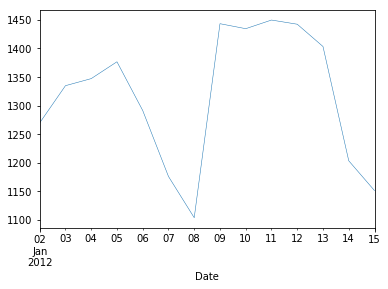

In [27]:
d.loc["2012-01-02":"2012-01-15"]["Consumption"].plot(linewidth=0.5)
plt.show()

Und jetzt für den ganzen Januar 2012:

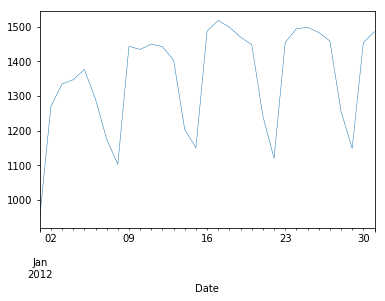

In [28]:
d.loc["2012-01"]["Consumption"].plot(linewidth=0.5)
plt.show()

Am Wochenende wird weniger Energie verbraucht. Vielleicht war die Fabriken / Firmen ruhen?

# Mehrere Plots auf einmal erzeugen:

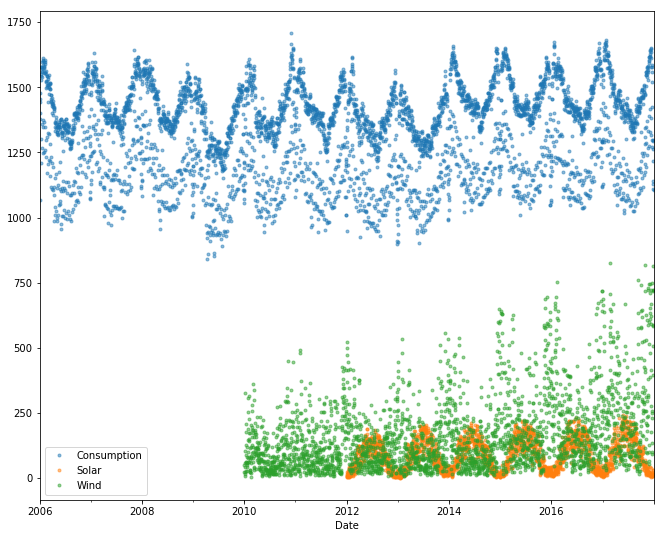

In [29]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = d[cols_plot].plot(marker='.',
                         alpha=0.5,
                         linestyle='None',
                         figsize=(11, 9))
plt.show()

Wir erkennen: auch die Energieproduktion durch Solar hat eine starke Periodizität. Die Energieproduktion durch Wind hat eine etwas schwächer ausgeprägte Periodizität.

Wir plotten jetzt die Daten in eigenen Subplots. Dann wird es übersichtlicher:

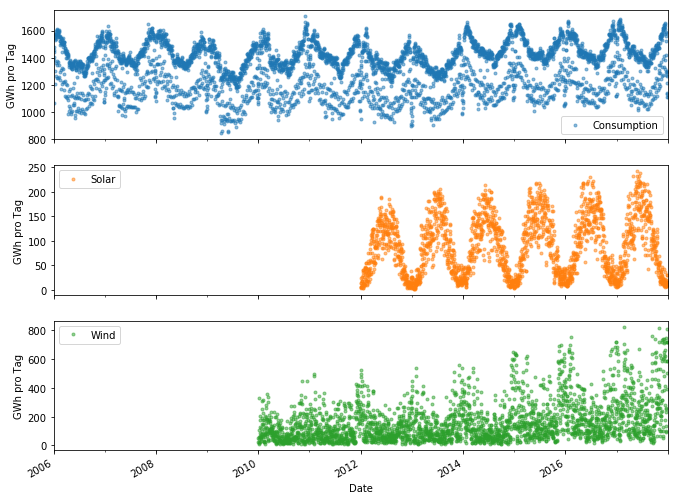

In [30]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = d[cols_plot].plot(marker='.',
                         alpha=0.5,
                         linestyle='None',
                         figsize=(11, 9),
                         subplots=True)
for ax in axes:
    ax.set_ylabel("GWh pro Tag")
plt.show()

# Ist die Windenergieproduktion im Winter größer?

Der Plot für die Windenergieproduktion scheint dies nahe zu legen.

Wir wollen dies jetzt aber mal wirklich mit harten Zahlen belegen:

Quiz!

Erzeugen Sie eine neue Spalte, in der angegeben ist, ob es Winter ist!

Wir definieren Winter als die Monate: Dezember, Januar, Februar

In [31]:
d["Winter"] = 0
mask = ((d["Monat"] == 12) | (d["Monat"] == 1) | (d["Monat"] == 2))
d["Winter"][mask] = 1 

C:\Users\Juergen Brauer\AppData\Local\conda\conda\envs\pythonkurs\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
d

,Consumption,Wind,Solar,Wind+Solar,Wochentag,Jahr,Monat,Winter
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,6,2006,1,1
2006-01-02,1380.52100,NaN,NaN,NaN,0,2006,1,1
2006-01-03,1442.53300,NaN,NaN,NaN,1,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2,2006,1,1
2006-01-05,1477.13100,NaN,NaN,NaN,3,2006,1,1
2006-01-06,1403.42700,NaN,NaN,NaN,4,2006,1,1
2006-01-07,1300.28700,NaN,NaN,NaN,5,2006,1,1
2006-01-08,1207.98500,NaN,NaN,NaN,6,2006,1,1
2006-01-09,1529.32300,NaN,NaN,NaN,0,2006,1,1


In [42]:
d.loc["2017-07-01"]

Consumption    1160.762
Wind            326.425
Solar           109.991
Wind+Solar      436.416
Wochentag         5.000
Jahr           2017.000
Monat             7.000
Winter            0.000
Name: 2017-07-01 00:00:00, dtype: float64

In [43]:
d.loc["2017-01-15"]

Consumption    1289.904
Wind            229.770
Solar            16.105
Wind+Solar      245.875
Wochentag         6.000
Jahr           2017.000
Monat             1.000
Winter            1.000
Name: 2017-01-15 00:00:00, dtype: float64

In [45]:
grouped = d["Consumption"].groupby( d["Winter"] )

In [46]:
grouped

In [47]:
print(grouped)

In [48]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
Winter,,,,,,,,
0,3300.0,1312.242616,155.961050,842.395,1189.5900,1352.825,1426.510500,1644.873
1,1083.0,1419.220273,168.850388,899.827,1283.9805,1469.645,1559.416345,1709.568


Man sieht: Ja! Tatsächlich, im Winter wird mehr Energie durch Wind produziert als in nicht-Winter-Monaten!